## Introduction
This file is concerned with the first asssignment in the ST 443 group project. The task is to classify the observation to one of the eight vegetation classes based on the reflectance values for each pixel in the i-th wavelenght band, i $ \ \in \ \{1, 2, \ldots, 218\}$. We will start with T1.1, which is concerned with data visualization and understanding the distribution of the features, and the target.

## Task 1.1 - Visualization and Summary statistics

### Import

In [ ]:
#Imports from the standard library
import sys

#Third-party imports
import pandas as pd
import numpy as np

#Local imports


/Users/mihneapiuaru/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Read the zipped csv file

In [3]:
#Replace the path with the absolute path of your file
data1=pd.read_csv('/Users/mihneapiuaru/Desktop/LSE Academic Courses/ST443/group_project/ml_project/data/data-1.csv.gz')

### Inspect the dataset

In [4]:
#Shape of the dataframe
print(f"\n Number of Rows: {data1.shape[0]} \n Number of Columns: {data1.shape[1]}")


 Number of Rows: 215604 
 Number of Columns: 223


In [5]:
#Datatypes of all the columns in the dataset
data1.dtypes

land_type       object
p_x              int64
p_y              int64
Band_1         float64
Band_2         float64
                ...   
Band_216       float64
Band_217       float64
Band_218       float64
rgb_hex         object
overlay_hex     object
Length: 223, dtype: object

In [6]:
#Information about the dataset
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215604 entries, 0 to 215603
Columns: 223 entries, land_type to overlay_hex
dtypes: float64(218), int64(2), object(3)
memory usage: 366.8+ MB


In [7]:
#Look at the first 5 entries
data1.head()

,land_type,p_x,p_y,Band_1,Band_2,Band_3,Band_4,Band_5,Band_6,Band_7,...,Band_211,Band_212,Band_213,Band_214,Band_215,Band_216,Band_217,Band_218,rgb_hex,overlay_hex
0,valley floor / meadow,0,0,0.0174,0.0131,0.0108,0.0133,0.0158,0.0144,0.0151,...,0.0237,0.0231,0.0224,0.0246,0.0255,0.0174,0.0234,0.0147,#030B05,#25C77140
1,valley floor / meadow,1,0,0.0180,0.0124,0.0116,0.0143,0.0154,0.0136,0.0151,...,0.0289,0.0275,0.0288,0.0293,0.0286,0.0211,0.0229,0.0176,#040A09,#25C77140
2,valley floor / meadow,2,0,0.0151,0.0150,0.0113,0.0158,0.0167,0.0158,0.0163,...,0.0358,0.0319,0.0355,0.0274,0.0303,0.0232,0.0282,0.0181,#08110B,#25C77140
3,valley floor / meadow,3,0,0.0172,0.0149,0.0095,0.0156,0.0154,0.0169,0.0176,...,0.0310,0.0294,0.0307,0.0238,0.0304,0.0232,0.0247,0.0087,#0C160C,#25C77140
4,valley floor / meadow,4,0,0.0184,0.0149,0.0143,0.0189,0.0174,0.0174,0.0182,...,0.0428,0.0372,0.0407,0.0344,0.0415,0.0287,0.0317,0.0176,#0E180C,#25C77140


In [8]:
#Summary statistics of the float columns
data1.select_dtypes(include = "float64").describe()

,Band_1,Band_2,Band_3,Band_4,Band_5,Band_6,Band_7,Band_8,Band_9,Band_10,...,Band_209,Band_210,Band_211,Band_212,Band_213,Band_214,Band_215,Band_216,Band_217,Band_218
count,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,...,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000,215604.000000
mean,0.095601,0.094335,0.095621,0.099081,0.100492,0.101252,0.102764,0.104476,0.105329,0.107272,...,0.110929,0.108438,0.108563,0.105381,0.105773,0.100424,0.099806,0.095834,0.092850,0.086839
std,0.164291,0.163833,0.165067,0.166807,0.167414,0.167216,0.167939,0.168141,0.168005,0.168948,...,0.059208,0.059431,0.059182,0.059277,0.058764,0.057765,0.056946,0.057251,0.054999,0.056024
min,-0.012000,-0.012600,-0.011900,-0.008800,-0.009300,-0.009000,-0.007700,-0.007500,-0.006600,-0.005300,...,0.007400,0.005700,0.006900,0.003600,0.006800,0.002400,0.004100,0.001100,0.000100,-0.010000
25%,0.022600,0.020600,0.020000,0.022900,0.023400,0.023800,0.024500,0.025500,0.025900,0.026900,...,0.058600,0.055700,0.056000,0.052500,0.053500,0.048900,0.048900,0.044400,0.043600,0.036300
50%,0.037800,0.036800,0.037700,0.040600,0.041600,0.042200,0.043400,0.045300,0.046200,0.047900,...,0.101100,0.098200,0.098200,0.094900,0.095000,0.089600,0.089000,0.085100,0.082300,0.076000
75%,0.078000,0.078000,0.081100,0.083800,0.086100,0.087700,0.090000,0.092700,0.094200,0.096900,...,0.157700,0.155500,0.155300,0.152500,0.152300,0.146400,0.145100,0.141500,0.136700,0.132000
max,1.581000,1.574100,1.587100,1.595900,1.603600,1.605300,1.609500,1.613800,1.608800,1.608500,...,0.453700,0.446600,0.453600,0.449000,0.446700,0.429900,0.435100,0.433000,0.429100,0.411200


In [15]:
#Missing values
missing_features = data1.select_dtypes(include = "float64").isna().sum().sum()
missing_target = data1['land_type'].isna().sum()
print(f"Total missing values in the feature space: {missing_features}")
print(f"Total missing target values: {missing_target}")

Total missing values in the feature space: 0
Total missing target values: 0


In [ ]:
#Invalid values check

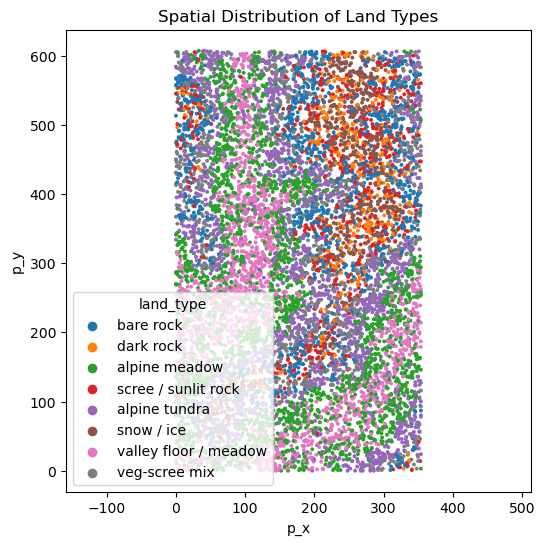

In [28]:
# Spatial distribution of land types (confirms figure 1 in the project description)
import seaborn as sns
import matplotlib.pyplot as plt
sample = data1.sample(10000, random_state=0)
plt.figure(figsize=(6,6))
sns.scatterplot(x="p_x", y="p_y", hue="land_type", data=sample, s=8, linewidth=0)
plt.title("Spatial Distribution of Land Types")
plt.axis("equal")
plt.show()

In [ ]:
# Missing & invalid value check
print("Negative reflectance values:", (data1[bands] < 0).sum().sum())
print("Reflectance values > 1:", (data1[bands] > 1).sum().sum())

# No missing values
# Some anomalous reflectance values (<0 or >1), some systematic observation errors like the sensor noise and shadowing may cause this.
# The anomalous may bother classification later? So shall we cap them to [0,1] range via:

# data1[bands] = data1[bands].clip(lower=0, upper=1)
# print("After clipping:")
# print("Min reflectance:", data1[bands].min().min())
# print("Max reflectance:", data1[bands].max().max())


# Outlier check
z = np.abs((data1[bands] - data1[bands].mean()) / data1[bands].std())
outliers = data1[np.any(z > 5, axis=1)]
print("Outlier rows (z > 5):", outliers.shape[0], "of", len(data1), 
      f"({outliers.shape[0]/len(data1)*100:.2f}% of total)")

# 1,925 rows (pixels) out of 218,680 total were flagged as having at least one spectral band with a z-score > 5 (i.e. more than 5 standard deviations from the mean).
# So 1925/218680 ~ 0.88% of data are potential outliers, which is acceptable (like really bright snow), no motivation to remove them.
# Column is still 223, no problem

Total missing values: 0
Negative reflectance values: 20000
Reflectance values > 1: 39777
Outlier rows (z > 5): 1925 of 215604 (0.89% of total)


,land_type,Count,Percentage
0,alpine meadow,50657,23.50
1,alpine tundra,38900,18.04
2,valley floor / meadow,38424,17.82
3,bare rock,26314,12.20
4,veg-scree mix,24495,11.36
5,scree / sunlit rock,15153,7.03
6,snow / ice,11533,5.35
7,dark rock,10128,4.70


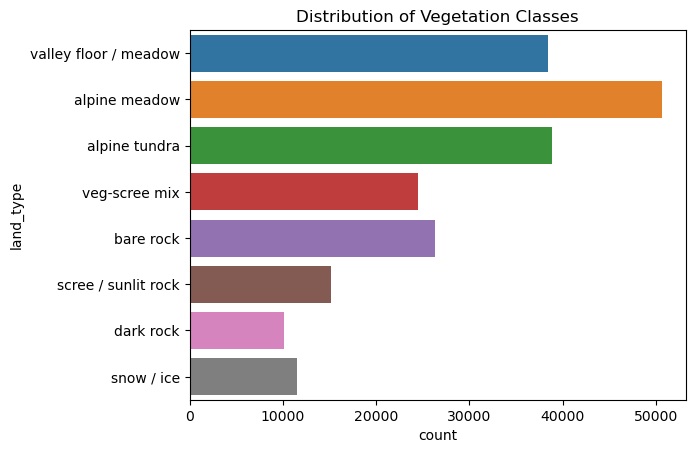

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


# Check distribution of vegetation classes to indentify potential imbalance(may affect classification later)
class_counts = data1["land_type"].value_counts()
class_percent = data1["land_type"].value_counts(normalize=True) * 100

balance_df = pd.DataFrame({
    "Count": class_counts,
    "Percentage": class_percent.round(2)
}).reset_index().rename(columns={"index": "Land Type"})

display(balance_df)
sns.countplot(y="land_type", data=data1)
plt.title("Distribution of Vegetation Classes")
plt.show()

# One can see that alpine meadow is the most domiant vegetation class.

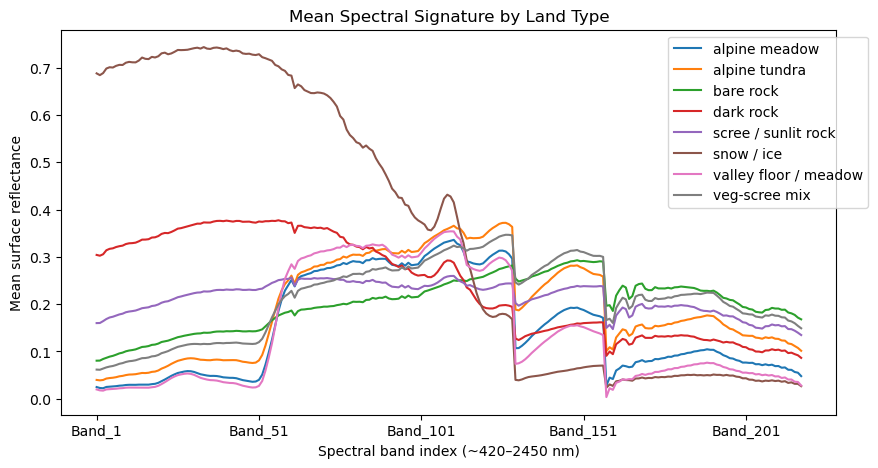

In [10]:
# Check if classes are separable in spectral space
mean_spectra = data1.groupby("land_type")[bands].mean().T
mean_spectra.plot(figsize=(10,5))
plt.xlabel("Spectral band index (~420–2450 nm)")
plt.ylabel("Mean surface reflectance")
plt.title("Mean Spectral Signature by Land Type")
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

# Lines that differ strongly → those classes are spectrally separable → classification should work well.
# Overlapping lines → those classes are spectrally similar → may need nonlinear models (e.g. GBDT / SVM).
# Smoothness across bands → confirms that adjacent bands are highly correlated. Motivates PCA or regularisation later.

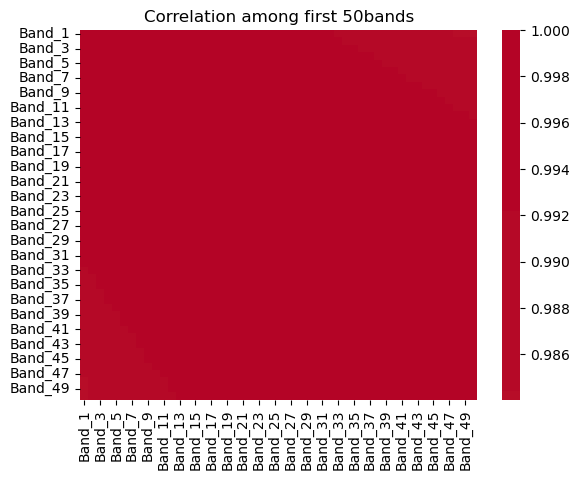

KeyboardInterrupt: 

In [11]:
# Correlation heatmap for the first 50 bands
corr50 = data1[bands[:50]].corr()
sns.heatmap(corr50, cmap="coolwarm", center=0)
plt.title("Correlation among first 50bands")
plt.show()

# Correlation heatmap for all bands
corrfull = data1[bands].corr()
sns.heatmap(corrfull, cmap="coolwarm", center=0)
plt.title("Correlation among all bands")
plt.show()

# I wouldn't say that given the large size of the data set a heatmap is strictly necessary, but we can see that there is a high correlation between adjacent bands.

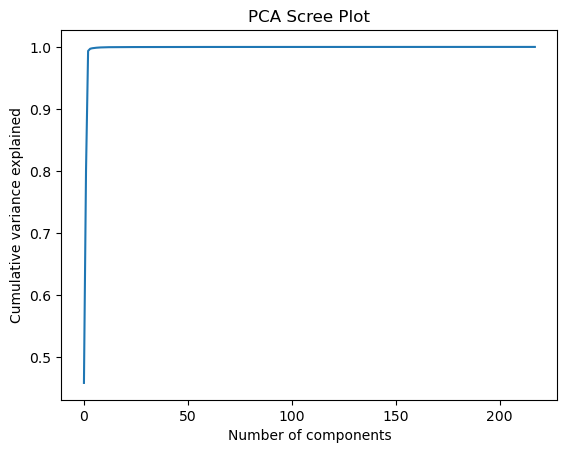

In [ ]:
# Preliminary PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

X = StandardScaler().fit_transform(data1[bands].sample(20000, random_state=1))
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative variance explained")
plt.title("PCA Scree Plot")
plt.show()

# The curve rises very steeply at the beginning and then flattens quickly
# This suggests that a small number of components can capture most of the variance in the data, which is promising for dimensionality reduction before classification.